### Import the JSON File with Industry Lab Sensor Data

In [1]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_915ea66450e44183938b1aab8572887f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x8LKJUWfwBvzMvyp4glOaZk6VQOcrYmbWV80lKToccNW',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_915ea66450e44183938b1aab8572887f.get_object(Bucket='dsbootcampac3431d743f2492ebe1cfe6103674873',Key='floorsensordata2604.json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face an error during data loading.
# Please read the documentation of 'pandas.read_json()' and 'pandas.io.json.json_normalize' to learn more about the possibilities to adjust the data loading.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
# and http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html

df_data_1 = pd.read_json(body, orient='values')
df_data_1.head()



,itemname,sensorname,time,value
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89


### Check the Structure of the Data Frame

In [2]:
df = df_data_1

In [3]:
df.head(10)

,itemname,sensorname,time,value
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89
5,51A51_5_temperature_value,item0006,2018-02-19T07:05:00.534Z,21.812
6,512F5_5_temperature_value,item0007,2018-02-19T07:05:00.607Z,21
7,45974_3_temperature_value,item0008,2018-02-19T07:05:00.687Z,21.06
8,52686_5_temperature_value,item0009,2018-02-19T07:05:00.760Z,21
9,45152_3_temperature_value,item0010,2018-02-19T07:05:00.839Z,20.2


In [4]:
df.tail(10)

,itemname,sensorname,time,value
760514,476CA_4_carbonDioxide_value,item0131,2018-04-26T14:00:03.218Z,798
760515,46CF4_4_carbonDioxide_value,item0104,2018-04-26T14:00:03.259Z,543
760516,45974_4_carbonDioxide_value,item0122,2018-04-26T14:00:03.280Z,744
760517,4692E_4_carbonDioxide_value,item0114,2018-04-26T14:00:03.301Z,795
760518,South_Workarea_3_Air,item0157,2018-04-26T14:00:03.321Z,500
760519,47406_4_carbonDioxide_value,item0126,2018-04-26T14:00:03.341Z,641
760520,47888_4_carbonDioxide_value,item0083,2018-04-26T14:00:03.362Z,896
760521,45C72_4_carbonDioxide_value,item0109,2018-04-26T14:00:03.383Z,730
760522,46C8A_4_carbonDioxide_value,item0072,2018-04-26T14:00:03.403Z,565
760523,Loisach_Occupancy,item0146,2018-04-26T14:00:52.918Z,occupied


In [5]:
df.itemname.unique()

array(['52760_5_temperature_value', '47406_3_temperature_value',
       '452B5_3_temperature_value', '452F9_3_temperature_value',
       '4521C_3_temperature_value', '51A51_5_temperature_value',
       '512F5_5_temperature_value', '45974_3_temperature_value',
       '52686_5_temperature_value', '45152_3_temperature_value',
       '51BEB_5_temperature_value', '45A95_3_temperature_value',
       '516AF_5_temperature_value', '51711_5_temperature_value',
       '51B62_5_temperature_value', '476CA_3_temperature_value',
       '51174_5_temperature_value', '511D3_5_temperature_value',
       '45A94_3_temperature_value', '5161B_5_temperature_value',
       '454CA_3_temperature_value', '510FD_5_temperature_value',
       '4562F_3_temperature_value', '51A63_5_temperature_value',
       '51B5C_5_temperature_value', '47888_3_temperature_value',
       '451E8_3_temperature_value', '5131F_5_temperature_value',
       '51C0A_5_temperature_value', '46C8A_3_temperature_value',
       '52259_5_temperatu

### Format Yanzi Sensor Data 

In [6]:
df['id'] = df['itemname'].str.split('_').str[0]

In [7]:
df['temperature'] = df[df['itemname'].str.contains('temperature')]['value'].astype(float)
df['carbonDioxide'] = df[df['itemname'].str.contains('carbonDioxide')]['value'].astype(float)
df['humidity'] = df[df['itemname'].str.contains('humidity')]['value'].astype(float)
df['illuminance'] = df[df['itemname'].str.contains('illuminance')]['value'].astype(float)
df['pressure'] = df[df['itemname'].str.contains('pressure')]['value'].astype(float)
df['Occupancy'] = df[df['itemname'].str.contains('Occupancy')]['value']

In [8]:
df.head()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5,52760,20.50,NaN,NaN,NaN,NaN,NaN
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61,47406,20.61,NaN,NaN,NaN,NaN,NaN
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89,452B5,19.89,NaN,NaN,NaN,NaN,NaN
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7,452F9,19.70,NaN,NaN,NaN,NaN,NaN
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89,4521C,18.89,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
760519,47406_4_carbonDioxide_value,item0126,2018-04-26T14:00:03.341Z,641,47406,NaN,641.0,NaN,NaN,NaN,NaN
760520,47888_4_carbonDioxide_value,item0083,2018-04-26T14:00:03.362Z,896,47888,NaN,896.0,NaN,NaN,NaN,NaN
760521,45C72_4_carbonDioxide_value,item0109,2018-04-26T14:00:03.383Z,730,45C72,NaN,730.0,NaN,NaN,NaN,NaN
760522,46C8A_4_carbonDioxide_value,item0072,2018-04-26T14:00:03.403Z,565,46C8A,NaN,565.0,NaN,NaN,NaN,NaN
760523,Loisach_Occupancy,item0146,2018-04-26T14:00:52.918Z,occupied,Loisach,NaN,NaN,NaN,NaN,NaN,occupied


In [10]:
df.describe()

,temperature,carbonDioxide,humidity,illuminance,pressure
count,342704.000000,50509.000000,160660.000000,102881.000000,58900.000000
mean,22.124608,531.344414,16.940346,162.919545,943.730369
std,1.815222,168.712879,5.128360,449.858628,8.895958
min,12.930000,395.000000,4.000000,0.000000,922.680000
25%,21.000000,412.000000,14.000000,0.460000,936.760000
50%,22.000000,472.000000,17.000000,14.720000,944.010000
75%,23.230000,579.000000,20.000000,162.380000,950.040000
max,32.780000,2215.000000,34.000000,15857.580000,967.260000


### Visualize Data with Pixidust

In [11]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [12]:
display(df)

### Filter on Shinano and Fill Missing Values

In [13]:
df_shinano = df[df['id'].isin(['4674C', 'Shinano'])].copy()

In [14]:
df_shinano.sort_values(by='time', inplace=True)

In [15]:
df_shinano.index = pd.to_datetime(df_shinano.time)

In [16]:
df_shinano.fillna(method='ffill', inplace=True)

In [17]:
df_shinano.fillna(method='bfill', inplace=True)

In [18]:
df_shinano.head()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
time,,,,,,,,,,,
2018-02-19 07:05:05.008,4674C_3_temperature_value,item0066,2018-02-19T07:05:05.008Z,18.5,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:10:00.118,4674C_4_carbonDioxide_value,item0095,2018-02-19T07:10:00.118Z,455,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.061,4674C_6_pressure_value,item0096,2018-02-19T07:15:01.061Z,950.51,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.460,4674C_3_humidity_value,item0094,2018-02-19T07:15:01.460Z,16,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.574,4674C_3_temperature_value,item0066,2018-02-19T07:15:01.574Z,18.58,4674C,18.58,455.0,16.0,NaN,950.51,free


In [19]:
df_shinano.drop(['illuminance'], axis=1, inplace=True)

In [20]:
df_shinano.describe()

,temperature,carbonDioxide,humidity,pressure
count,22744.000000,22744.000000,22744.000000,22744.000000
mean,21.716864,617.600114,17.815732,941.909597
std,2.472216,232.130746,3.968186,8.905109
min,15.210000,398.000000,7.000000,922.980000
25%,20.280000,431.000000,15.000000,934.630000
50%,21.720000,558.000000,18.000000,942.615000
75%,22.810000,706.000000,20.000000,948.130000
max,32.780000,2215.000000,31.000000,962.590000


In [21]:
df_shinano.Occupancy.unique()

array(['free', 'occupied'], dtype=object)

In [22]:
df_shinano.groupby('Occupancy')['time'].nunique()

Occupancy
free        16948
occupied     5796
Name: time, dtype: int64

### Plot Sensor Values depending on Occupancy State

In [23]:
import matplotlib.pyplot as plt

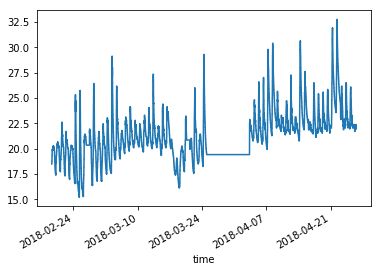

In [24]:
df_shinano.temperature.plot()

### Build Simple Prediction Model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_shinano_model = df_shinano.copy()

In [27]:
df_shinano_model.loc[df_shinano_model.Occupancy == 'free', 'Occupancy'] = 0
df_shinano_model.loc[df_shinano_model.Occupancy == 'occupied', 'Occupancy'] = 1

In [28]:
y = df_shinano_model['Occupancy'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
X = df_shinano_model.loc[:, ['temperature', 'carbonDioxide', 'humidity', 'pressure']].values
X

array([[  18.5 ,  455.  ,   16.  ,  950.51],
       [  18.5 ,  455.  ,   16.  ,  950.51],
       [  18.5 ,  455.  ,   16.  ,  950.51],
       ..., 
       [  22.22,  815.  ,   21.  ,  949.91],
       [  22.39,  815.  ,   21.  ,  949.91],
       [  22.39,  812.  ,   21.  ,  949.91]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [39]:
clf = RandomForestClassifier(n_estimators=1)

In [40]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
clf.score(X_test, y_test)

0.91382721477247741

In [42]:
predictions = clf.predict(X_test)

In [43]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94      3377
          1       0.83      0.83      0.83      1172

avg / total       0.91      0.91      0.91      4549



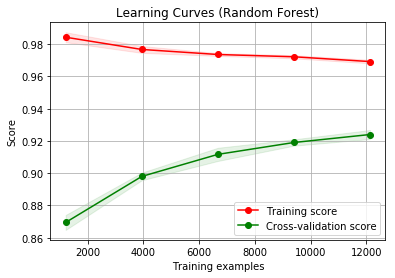

In [38]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()